#Assignment 3b: Final Code

##Group 18
###Yurou Qiu A1893163
###Tanveer Akram A1904700
###Sharlene Rodrigues A1894739

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from mlxtend.frequent_patterns import apriori, association_rules
import random

import warnings
warnings.filterwarnings("ignore")

#1. Read The Dataset

In [ ]:
# This code is from Workshop 3 [14]

# Use Pandas to read the data frame
file_path = 'Groceries data train.csv'
file_path_test = 'Groceries data test.csv'
train_data = pd.read_csv(file_path)
test_data = pd.read_csv(file_path_test)

In [ ]:
# This code is from Workshop 3 [14]

train_data.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1


#2. Analyze the Dataset

In [ ]:
# This code is from Workshop 3 [14]

#Identify the columns to see what the headers are
train_data.columns

Index(['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [ ]:
# This code is from Workshop 3 [14]

#Finding the number of rows and columns to identify the size of the dataset
print("Number of rows and columns:", train_data.shape)

#270000 rows of input
#Lots of data to help generate recommendations

Number of rows and columns: (27000, 7)


In [ ]:
# This code is from Workshop 3 [14]

#A little more data exploration to understand the data types

#Finding Categorical Data
categorical = [var for var in train_data.columns if train_data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

#Finding Numerical Data
decimal = [var_1 for var_1 in train_data.columns if train_data[var_1].dtype=='int']

print('\n\nThere are {} Numeric variables\n'.format(len(decimal)))
print('The Numerical variables are :\n\n', decimal)

#No point in visualizing graphs about the distribution of the columns

There are 2 categorical variables

The categorical variables are :

 ['Date', 'itemDescription']


There are 5 Numeric variables

The Numerical variables are :

 ['Member_number', 'year', 'month', 'day', 'day_of_week']


In [ ]:
# This code is from Workshop 3 [14]

# Find all unique values in the itemDescription column
unique_items = train_data['itemDescription'].unique()

print("Unique values in itemDescription:")
print(unique_items)

print("\nNumber of unique items:", len(unique_items))

#Just to understand what items are there in our dataset

Unique values in itemDescription:
['frankfurter' 'pork' 'root vegetables' 'onions' 'waffles' 'cereals'
 'yogurt' 'sausage' 'rolls/buns' 'chocolate' 'whipped/sour cream' 'butter'
 'curd' 'frozen meals' 'whole milk' 'tropical fruit' 'sugar'
 'specialty cheese' 'other vegetables' 'fruit/vegetable juice'
 'misc. beverages' 'frozen vegetables' 'spices' 'coffee' 'cream cheese '
 'red/blush wine' 'dessert' 'long life bakery product' 'domestic eggs'
 'abrasive cleaner' 'berries' 'liquor (appetizer)' 'semi-finished bread'
 'newspapers' 'beverages' 'beef' 'female sanitary products' 'salt' 'soda'
 'sauces' 'oil' 'snack products' 'brown bread' 'hygiene articles'
 'artif. sweetener' 'bottled beer' 'canned beer' 'hamburger meat'
 'liver loaf' 'soups' 'pip fruit' 'hard cheese' 'shopping bags'
 'canned vegetables' 'napkins' 'citrus fruit' 'margarine' 'pasta'
 'salty snack' 'candles' 'cat food' 'meat' 'candy' 'condensed milk'
 'UHT-milk' 'chewing gum' 'chicken' 'soft cheese' 'pastry'
 'specialty chocol

In [ ]:
# This code is from Workshop 3 [14]

# Find all unique values in the Member_number column
unique_items = train_data['Member_number'].unique()

print("Unique values in Member_number:")
print(unique_items)

print("\nNumber of unique items:", len(unique_items))

#Just to understand how many Members are there in our training dataset

Unique values in Member_number:
[3021 1292 4206 ... 1459 4386 1942]

Number of unique items: 3872


In [ ]:
# This code is from Workshop 4 [15]

#Checking any null or missing values

df_missing=pd.DataFrame((round(100*(train_data.isnull().sum()/len(train_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

#No missing values

,missing
Member_number,0.0
Date,0.0
itemDescription,0.0
year,0.0
month,0.0
day,0.0
day_of_week,0.0


#3. Visualize The Dataset

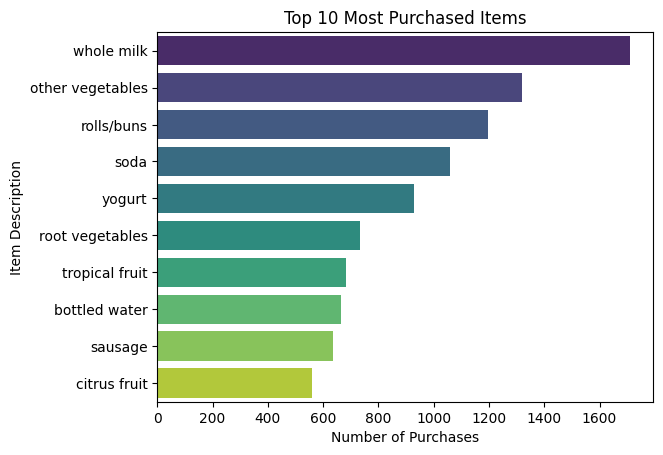

In [ ]:
# This code is from Workshop 3  [14]

# Visualizing the most purchased items
item_counts = train_data['itemDescription'].value_counts().head(10)
sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Number of Purchases')
plt.ylabel('Item Description')
plt.show()

#This bar chart shows the most frequently purchased items, which provides insights into popular products.

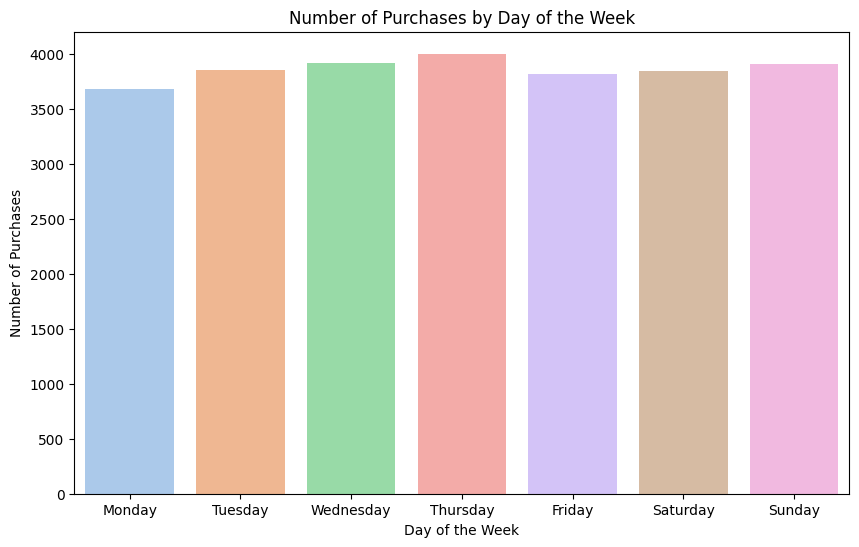

In [ ]:
# This code is from Workshop 3  [14]

# Count the number of purchases by day of the week
day_counts = train_data['day_of_week'].value_counts().reindex([0,1, 2, 3, 4, 5, 6, ])

# Plot the purchases by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='pastel')
plt.title('Number of Purchases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

#Number of purchases by day is evenly distributed

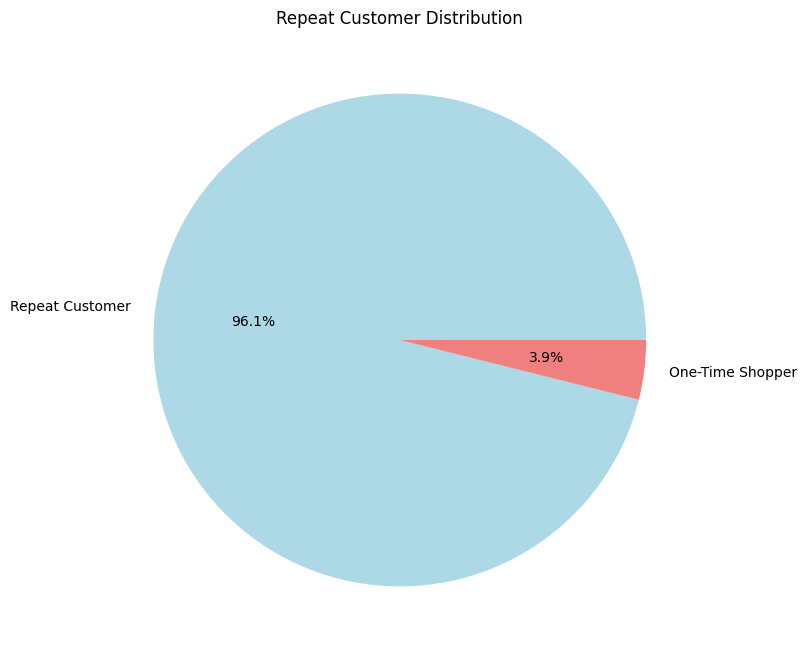

In [ ]:
# This code is from Workshop 3  [14]

#Checking how many customers are frequent shoppers
loyalty_counts = train_data['Member_number'].value_counts()
loyalty_labels = ['Repeat Customer', 'One-Time Shopper']
loyalty_sizes = [len(loyalty_counts[loyalty_counts > 1]), len(loyalty_counts[loyalty_counts == 1])]

plt.figure(figsize=(8, 8))
plt.pie(loyalty_sizes, labels=loyalty_labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Repeat Customer Distribution')
plt.show()

#96% of the shoppers are repeat customers
#This means that making recommendations can be strong through their frequent buying patterns

#4. Frequent pattern mining

###Recording the start time to generate frequent patterns

In [ ]:
frequent_patterns_start_time = time.time()

In [ ]:
# This code is from Workshop 10 [16]

# Prepare transaction data for training set
transaction_data_train = train_data.groupby(['Member_number', 'itemDescription']).size().unstack(fill_value=0)
transaction_data_train = transaction_data_train.applymap(lambda x: 1 if x > 0 else 0)

# Prepare transaction data for test set
transaction_data_test = test_data.groupby(['Member_number', 'itemDescription']).size().unstack(fill_value=0)
transaction_data_test = transaction_data_test.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets for training set
frequent_itemsets_train = apriori(transaction_data_train, min_support=0.01, use_colnames=True)

# Generate frequent itemsets for test set
frequent_itemsets_test = apriori(transaction_data_test, min_support=0.01, use_colnames=True)

# Generate association rules for training set
rules_train = association_rules(frequent_itemsets_train, metric="confidence", min_threshold=0.01)

# Generate association rules for test set
rules_test = association_rules(frequent_itemsets_test, metric="confidence", min_threshold=0.01)

# We use Apriori algorithm to mine frequent itemsets from transaction data.
# Frequent itemsets represent combinations of items that frequently co-occur in transactions.
# Association rules are then generated from these frequent itemsets, which indicate the likelihood of one item being purchased given the purchase of another item.

# This analysis helps in understanding patterns of item co-occurrence and can be used for market basket analysis and recommendation systems.

In [ ]:
#This code is based on [4]

# Create the user-item interaction matrix
def create_user_item_matrix(data):
    """
    Create a user-item interaction matrix from transaction data.

    Parameters:
    - data: DataFrame containing transaction data

    Returns:
    - DataFrame representing the user-item interaction matrix
    """
    user_item_matrix = pd.DataFrame(0, index=data["Member_number"].unique(), columns=data["itemDescription"].unique(), dtype=int)
    for _, row in data.iterrows():
        user_item_matrix.loc[row['Member_number'], row['itemDescription']] = 1
    return user_item_matrix


#The function create_user_item_matrix creates a user-item interaction matrix from transaction data,
#where rows represent users, columns represent items, and cells indicate whether a user has purchased an item.

In [ ]:
#This matrix is essential for generating recommendations and analyzing user-item interactions.
user_item_matrix = create_user_item_matrix(train_data)

In [ ]:
# Augment the user-item matrix with Apriori recommendations
def augment_user_item_matrix(user_item_matrix, apriori_recommendations):
    """
    Augment the user-item interaction matrix with Apriori recommendations.

    Parameters:
    - user_item_matrix: DataFrame representing the user-item interaction matrix
    - apriori_recommendations: Dictionary containing Apriori recommendations for each user

    Returns:
    - Augmented user-item interaction matrix with Apriori recommendations incorporated
    """
    augmented_matrix = user_item_matrix.copy()
    for member_number, recommendations in apriori_recommendations.items():
        for item in recommendations:
            if item in augmented_matrix.columns:
                augmented_matrix.loc[member_number, item] = 1 #This code is based on code from [8]
    return augmented_matrix


#The function augment_user_item_matrix augments the existing user-item interaction matrix with Apriori recommendations.
#It iterates over each user and their corresponding Apriori recommendations, updating the matrix accordingly.

In [ ]:
#This code is based on code from [1]

def get_apriori_recommendations(purchased_items, rules, top_n=5):
    """
    Generate recommendations based on Apriori association rules.

    Parameters:
    - purchased_items: List of items purchased by the user
    - rules: DataFrame containing association rules
    - top_n: Number of top recommendations to return

    Returns:
    - List of recommended items based on association rules
    """
    recommended_items = set()
    for item in purchased_items:
        related_rules = rules[rules['antecedents'].apply(lambda x: item in x)]
        for _, rule in related_rules.iterrows():
            recommended_items.update(rule['consequents'])
    recommended_items = list(recommended_items - set(purchased_items))
    return recommended_items[:top_n]


#The function get_apriori_recommendations generates recommendations based on association rules mined using the Apriori algorithm.
#It takes purchased items and association rules as input and returns a list of recommended items.

In [ ]:
# Generate Apriori recommendations for each user
apriori_recommendations = {}
for member_number in train_data['Member_number'].unique():
    purchased_items = train_data[train_data['Member_number'] == member_number]['itemDescription'].tolist()
    apriori_recs = get_apriori_recommendations(purchased_items, rules_train, top_n=5)
    apriori_recommendations[member_number] = apriori_recs

# Augment the user-item matrix
augmented_user_item_matrix = augment_user_item_matrix(user_item_matrix, apriori_recommendations)
augmented_user_item_matrix


#The code then generates Apriori recommendations for each user based on their purchase history using the previously defined get_apriori_recommendations function.
#Finally, it augments the user-item matrix with the generated Apriori recommendations,
#resulting in an augmented matrix that includes both original purchase data and Apriori recommendations.

,frankfurter,pork,root vegetables,onions,waffles,cereals,yogurt,sausage,rolls/buns,chocolate,...,organic sausage,house keeping products,frozen fruits,bathroom cleaner,skin care,bags,rubbing alcohol,make up remover,preservation products,kitchen utensil
3021,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1292,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4369,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1522,0,0,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3605,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
apriori_recommendations

{3021: ['domestic eggs', 'margarine', 'whole milk', 'dessert', 'brown bread'],
 1292: ['dessert', 'brown bread', 'salty snack', 'tropical fruit', 'beef'],
 4206: ['salty snack', 'dessert', 'brown bread', 'tropical fruit', 'oil'],
 4369: ['dessert', 'brown bread', 'salty snack', 'tropical fruit', 'oil'],
 1522: ['dessert', 'brown bread', 'salty snack', 'tropical fruit', 'oil'],
 2053: ['domestic eggs', 'margarine', 'whole milk', 'dessert', 'brown bread'],
 2914: ['domestic eggs', 'margarine', 'salty snack', 'dessert', 'brown bread'],
 4089: ['domestic eggs', 'margarine', 'whole milk', 'dessert', 'brown bread'],
 2460: ['salty snack', 'dessert', 'brown bread', 'tropical fruit', 'oil'],
 2738: ['salty snack', 'dessert', 'brown bread', 'tropical fruit', 'oil'],
 2074: ['domestic eggs', 'margarine', 'whole milk', 'dessert', 'brown bread'],
 1038: ['dessert', 'brown bread', 'salty snack', 'tropical fruit', 'oil'],
 4277: ['dessert', 'salty snack', 'tropical fruit', 'oil', 'beef'],
 2564: ['d

In [ ]:
frequent_patterns_time = time.time() - frequent_patterns_start_time
frequent_patterns_time

236.2323019504547

In [ ]:
# This code is based on code from [2]

# Extract 5 random patterns from the training set rules
random.seed(78)
num_rules_train = len(rules_train)
random_indices_train = random.sample(range(num_rules_train), min(5, num_rules_train))
patterns_train = rules_train.iloc[random_indices_train]

# Extract 5 random patterns from the test set rules
num_rules_test = len(rules_test)
random_indices_test = random.sample(range(num_rules_test), min(5, num_rules_test))
patterns_test = rules_test.iloc[random_indices_test]

In [ ]:
# Print patterns for training set
print("Patterns from Training Set:")
for _, rule in patterns_train.iterrows():
    antecedent = list(rule['antecedents'])[0]  # Convert frozenset to list
    consequent = list(rule['consequents'])[0]  # Convert frozenset to list
    support = rule['support']
    confidence = rule['confidence']
    print(f"If {antecedent} -> {consequent}")
    print(f"Support: {support}, Confidence: {confidence}\n")

# Print patterns for test set
print("Patterns from Test Set:")
for _, rule in patterns_test.iterrows():
    antecedent = list(rule['antecedents'])[0]  # Convert frozenset to list
    consequent = list(rule['consequents'])[0]  # Convert frozenset to list
    support = rule['support']
    confidence = rule['confidence']
    print(f"If {antecedent} -> {consequent}")
    print(f"Support: {support}, Confidence: {confidence}\n")

Patterns from Training Set:
If napkins -> rolls/buns
Support: 0.02246900826446281, Confidence: 0.36401673640167365

If pip fruit -> chocolate
Support: 0.010330578512396695, Confidence: 0.08583690987124463

If pip fruit -> bottled water
Support: 0.011880165289256199, Confidence: 0.09871244635193133

If whole milk -> sugar
Support: 0.020144628099173553, Confidence: 0.05799256505576208

If whole milk -> pastry
Support: 0.018853305785123967, Confidence: 0.05427509293680297

Patterns from Test Set:
If bottled water -> other vegetables
Support: 0.012338754907459339, Confidence: 0.1685823754789272

If pastry -> other vegetables
Support: 0.010095344924284913, Confidence: 0.16216216216216217

If rolls/buns -> yogurt
Support: 0.01430173864273696, Confidence: 0.10408163265306122

If root vegetables -> other vegetables
Support: 0.01514301738642737, Confidence: 0.16822429906542055

If whole milk -> shopping bags
Support: 0.016545148625911384, Confidence: 0.08286516853932584



In [ ]:
# Prepare the data for the table
table_data = []
for i in range(len(patterns_train)):
    train_rule = patterns_train.iloc[i]
    test_rule = patterns_test.iloc[i]

    antecedent = list(train_rule['antecedents'])[0]
    consequent = list(train_rule['consequents'])[0]

    table_data.append({
        'Antecedent': antecedent,
        'Consequent': consequent,
        'Support (Train)': train_rule['support'],
        'Confidence (Train)': train_rule['confidence'],
        'Support (Test)': test_rule['support'],
        'Confidence (Test)': test_rule['confidence']
    })

# Create a DataFrame for the table
metrics_df = pd.DataFrame(table_data)
print(metrics_df)

# Discussion
print("\nDiscussion:")
for index, row in metrics_df.iterrows():
    print(f"Pattern {index + 1}: If {row['Antecedent']} -> {row['Consequent']}")
    print(f"Training Support: {row['Support (Train)']:.4f}, Training Confidence: {row['Confidence (Train)']:.4f}")
    print(f"Test Support: {row['Support (Test)']:.4f}, Test Confidence: {row['Confidence (Test)']:.4f}")
    print("\n")

   Antecedent     Consequent  Support (Train)  Confidence (Train)  \
0     napkins     rolls/buns         0.022469            0.364017   
1   pip fruit      chocolate         0.010331            0.085837   
2   pip fruit  bottled water         0.011880            0.098712   
3  whole milk          sugar         0.020145            0.057993   
4  whole milk         pastry         0.018853            0.054275   

   Support (Test)  Confidence (Test)  
0        0.012339           0.168582  
1        0.010095           0.162162  
2        0.014302           0.104082  
3        0.015143           0.168224  
4        0.016545           0.082865  

Discussion:
Pattern 1: If napkins -> rolls/buns
Training Support: 0.0225, Training Confidence: 0.3640
Test Support: 0.0123, Test Confidence: 0.1686


Pattern 2: If pip fruit -> chocolate
Training Support: 0.0103, Training Confidence: 0.0858
Test Support: 0.0101, Test Confidence: 0.1622


Pattern 3: If pip fruit -> bottled water
Training Support: 0.

In [ ]:
# Create the transaction data in the required format
def create_transaction_data(data):
    transaction_data = data.groupby(['Member_number', 'itemDescription']).size().unstack(fill_value=0)
    transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)
    return transaction_data

# Generate frequent itemsets
def generate_frequent_itemsets(transaction_data, min_support=0.01):
    return apriori(transaction_data, min_support=min_support, use_colnames=True)

# Generate association rules
def generate_association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01):
    return association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)

# Extract patterns with their confidence and support
def extract_patterns(rules, n=5):
    # Set the seed for reproducibility
    random.seed(42)

    # Select n random indices
    num_rules = len(rules)
    if num_rules < n:
        n = num_rules  # Adjust n if there are fewer rules than requested
    random_indices = random.sample(range(num_rules), n)

    # Get the association rules at the selected indices
    random_rules = rules.iloc[random_indices]

    patterns = []
    for _, rule in random_rules.iterrows():
        # Get the antecedent item(s)
        antecedent = list(rule['antecedents'])[0]  # Convert frozenset to list

        # Get the consequent item(s)
        consequent = list(rule['consequents'])[0]  # Convert frozenset to list

        # Get the support and confidence
        support = rule['support']
        confidence = rule['confidence']

        patterns.append({
            'antecedent': antecedent,
            'consequent': consequent,
            'support': support,
            'confidence': confidence
        })

    return patterns

# Function to print patterns
def print_patterns(patterns, dataset_name):
    print(f"Patterns from {dataset_name} Set:")
    for pattern in patterns:
        print(f"If {pattern['antecedent']} -> {pattern['consequent']}")
        print(f"Support: {pattern['support']}, Confidence: {pattern['confidence']}\n")

# Prepare transaction data
transaction_data_train = create_transaction_data(train_data)
transaction_data_test = create_transaction_data(test_data)

# Generate frequent itemsets and association rules
frequent_itemsets_train = generate_frequent_itemsets(transaction_data_train, min_support=0.01)
frequent_itemsets_test = generate_frequent_itemsets(transaction_data_test, min_support=0.01)
rules_train = generate_association_rules(frequent_itemsets_train, metric="confidence", min_threshold=0.01)
rules_test = generate_association_rules(frequent_itemsets_test, metric="confidence", min_threshold=0.01)

# Extract and print patterns
patterns_train = extract_patterns(rules_train, n=5)
patterns_test = extract_patterns(rules_test, n=5)

print_patterns(patterns_train, "Training")
print_patterns(patterns_test, "Test")


Patterns from Training Set:
If other vegetables -> coffee
Support: 0.030991735537190084, Confidence: 0.10879419764279238

If domestic eggs -> bottled beer
Support: 0.012396694214876033, Confidence: 0.1266490765171504

If other vegetables -> bottled beer
Support: 0.013946280991735538, Confidence: 0.04895738893925657

If white bread -> sausage
Support: 0.010330578512396695, Confidence: 0.16666666666666666

If pork -> rolls/buns
Support: 0.02763429752066116, Confidence: 0.2907608695652174

Patterns from Test Set:
If citrus fruit -> whole milk
Support: 0.014021312394840156, Confidence: 0.20576131687242796

If whole milk -> bottled beer
Support: 0.011217049915872126, Confidence: 0.05617977528089888

If yogurt -> other vegetables
Support: 0.018227706113292205, Confidence: 0.16971279373368148

If tropical fruit -> other vegetables
Support: 0.012619181155356141, Confidence: 0.13595166163141995

If other vegetables -> soda
Support: 0.019068984856982614, Confidence: 0.1261595547309833



Calculate time required to generate and integrate the frquent patterns

#Collaborative Filtering

In [ ]:
#This code is based on code from [4], [5]

# Create the co-purchase matrix
def co_purchase_frequency(data):
    """
    Create a co-purchase matrix from transaction data.

    Parameters:
    - data: DataFrame containing transaction data

    Returns:
    - DataFrame representing the co-purchase matrix
    """
    member_purchases = data.groupby("Member_number")
    co_purchase_matrix = pd.DataFrame(index=data["itemDescription"].unique(), columns=data["Member_number"].unique())
    co_purchase_matrix = co_purchase_matrix.fillna(0)
    for member, purchases in member_purchases:
        items = purchases["itemDescription"].values
        for item1 in items:
            for item2 in items:
                if item1 != item2:
                    co_purchase_matrix.loc[item1, member] += 1
    return co_purchase_matrix


#The function co_purchase_frequency creates a co-purchase matrix from transaction data, where rows represent unique items and columns represent unique members.
#It iterates over each member's purchases and updates the co-purchase matrix accordingly,
#incrementing the count for pairs of items purchased together (excluding self-purchases).
#The resulting co-purchase matrix provides insights into item co-occurrence patterns and can be used for collaborative filtering and market basket analysis.

In [ ]:
#This code is based on code from Workshop 11 [17]

# Similarity function (Cosine similarity)
def similarity(item1, item2):
    """
    Calculate Pearson correlation similarity between two items.

    Parameters:
    - item1: Array representing purchases of item 1 across users
    - item2: Array representing purchases of item 2 across users

    Returns:
    - Cosine similarity between item1 and item2
    """
    # Calculate the dot product of the two user vectors
    dot_product = np.dot(item1, item2)
    # Calculate the magnitude of the two user vectors
    magnitude = np.sqrt(np.sum(item1 ** 2) * np.sum(item2 ** 2))
    # Calculate the similarity between the two users
    similarity = dot_product / magnitude
    return similarity

# Compute item-item similarity matrix
def compute_item_similarity_matrix(co_purchase_matrix):
    """
    Compute item-item similarity matrix based on co-purchase matrix.

    Parameters:
    - co_purchase_matrix: DataFrame representing the co-purchase matrix

    Returns:
    - DataFrame representing the item-item similarity matrix
    """
    num_items = co_purchase_matrix.shape[0]
    item_similarity_matrix = pd.DataFrame(np.zeros((num_items, num_items)), index=co_purchase_matrix.index, columns=co_purchase_matrix.index)
    for i in range(num_items):
        for j in range(num_items):
            if i != j:
                item_similarity_matrix.iloc[i, j] = similarity(co_purchase_matrix.iloc[i].values, co_purchase_matrix.iloc[j].values)
    return item_similarity_matrix


#The function similarity calculates the Pearson correlation similarity between two items based on their purchase history across users.
#The function compute_item_similarity_matrix computes the item-item similarity matrix using the Pearson correlation similarity measure.
#It iterates over each pair of items in the co-purchase matrix and calculates their similarity.
#The resulting item-item similarity matrix provides insights into the similarity between items,
#which is used for collaborative filtering and recommendation generation.

In [ ]:
#This code is based on code from Workshop 11 [17]

# Predict rating function
def predict_rating(user_ratings, item_index, item_similarity_matrix):
    """
    Predict the rating for an item based on user-item ratings and item-item similarity.

    Parameters:
    - user_ratings: Array representing the ratings given by a user to each item
    - item_index: Index of the item for which rating is to be predicted
    - item_similarity_matrix: DataFrame representing the item-item similarity matrix

    Returns:
    - Predicted rating for the item
    """
    similar_items = item_similarity_matrix.iloc[item_index].values
    weighted_sum = np.dot(similar_items, user_ratings)
    similarity_sum = np.sum(np.abs(similar_items))
    if similarity_sum == 0:
        return 0
    return weighted_sum / similarity_sum

# Recommend items function
def cf_recommend_items(user_ratings, item_names, target_user, item_similarity_matrix, top_n=3):
    """
    Generate recommendations for a user based on user-item ratings and item-item similarity.

    Parameters:
    - user_ratings: Array representing the ratings given by a user to each item
    - item_names: List of item names
    - target_user: ID of the target user
    - item_similarity_matrix: DataFrame representing the item-item similarity matrix
    - top_n: Number of top recommendations to return

    Returns:
    - List of recommended items for the target user
    - Predicted ratings
    """
    unwatched_indices = np.where(user_ratings == 0)[0]
    predicted_ratings = [predict_rating(user_ratings, item_index, item_similarity_matrix) for item_index in unwatched_indices]
    sorted_indices = np.argsort(predicted_ratings)[::-1]
    top_items = sorted_indices[:top_n]
    recommended_items = [item_names[i] for i in top_items]
    return recommended_items, predicted_ratings

#The predict_rating function predicts the rating for an item based on the ratings given by a user to other items and the similarity between the item and other items.
#The cf_recommend_items function generates recommendations for a user by predicting ratings returning the top-n items with the highest predicted ratings.
#These functions are essential for generating personalized recommendations for users based on their past interactions and item similarities.

In [ ]:
#This code is based on code from [13]

tfidf = TfidfVectorizer(stop_words='english')

item_profiles = tfidf.fit_transform(train_data['itemDescription'].unique())
item_profiles = item_profiles.toarray()

item_index_mapping = {item: idx for idx, item in enumerate(train_data['itemDescription'].unique())}

#The TfidfVectorizer from scikit-learn is used to compute TF-IDF (Term Frequency-Inverse Document Frequency) vectors for item descriptions.
#The fit_transform method computes the TF-IDF vectors for unique item descriptions in the training data.
#The resulting TF-IDF vectors are converted to a dense array format using toarray.
#A dictionary item_index_mapping is created to map each item description to its corresponding index in the TF-IDF vectors.
#This mapping is useful for retrieving item profiles during recommendation generation.

In [ ]:
# Content-based filtering function (assuming item_profiles and item_index_mapping are available)
def get_content_recommendations(member_id, interaction_matrix, item_profiles, item_index_mapping, top_n=5):
    """
    Generate content-based recommendations for a user based on their purchase history.

    Parameters:
    - member_id: ID of the target user
    - interaction_matrix: DataFrame representing the user-item interaction matrix
    - item_profiles: Array representing TF-IDF vectors for item descriptions
    - item_index_mapping: Dictionary mapping item descriptions to their corresponding indices in item_profiles
    - top_n: Number of top recommendations to return

    Returns:
    - List of content-based recommendations for the target user
    """
    if member_id not in interaction_matrix.columns:
        # If member_id is not present in the interaction matrix, provide default recommendations
        overall_popularity = interaction_matrix.sum(axis=1)
        popular_items_indices = overall_popularity.argsort()[::-1][:top_n]
        popular_items = [list(item_index_mapping.keys())[i] for i in popular_items_indices]
        return popular_items

    # Get the member's purchase history from the interaction matrix
    member_data = interaction_matrix[member_id]
    member_items = member_data[member_data > 0].index.tolist()

    # Get the TF-IDF vectors for the items the member has purchased
    member_item_vectors = item_profiles[[item_index_mapping[item] for item in member_items]]

    # Calculate the mean vector for the purchased items to represent the member's profile
    member_profile = member_item_vectors.mean(axis=0).reshape(1, -1)

    # Calculate the cosine similarity between the member profile and all item profiles
    similarities = cosine_similarity(member_profile, item_profiles).flatten()

    # Get the top n most similar items
    similar_items_indices = similarities.argsort()[::-1][:top_n]
    similar_items = [list(item_index_mapping.keys())[i] for i in similar_items_indices]

    return similar_items

#The function get_content_recommendations generates content-based recommendations for a user based on their purchase history.
#It first checks if the user exists in the interaction matrix. If not, it returns default recommendations based on overall item popularity.
#If the user exists, it computes the user's profile by averaging the TF-IDF vectors of items they have purchased.
#It then calculates the cosine similarity between the user profile and all item profiles to identify similar items.
#Finally, it returns the top-n most similar items as recommendations for the user.

In [ ]:
# Combine collaborative and content-based recommendations
def combine_recommendations(collab_recs, content_recs, weights=(0.5, 0.5), top_n=5):
    """
    Combine collaborative and content-based recommendations using weighted sum.

    Parameters:
    - collab_recs: List of collaborative filtering recommendations
    - content_recs: List of content-based filtering recommendations
    - weights: Tuple containing weights for collaborative and content-based recommendations
    - top_n: Number of top recommendations to return

    Returns:
    - List of hybrid recommendations
    """
    combined_scores = {}
    for item in set(collab_recs + content_recs):
        combined_scores[item] = (weights[0] * (item in collab_recs) + weights[1] * (item in content_recs))
    sorted_items = sorted(combined_scores, key=combined_scores.get, reverse=True)


    return sorted_items[:top_n]

#Collaborative filtering recommendations are generated for each user based on their augmented user-item matrix.
#Content-based filtering recommendations are generated for each user based on their purchase history and item profiles.
#Both types of recommendations are then combined using a weighted sum approach to generate hybrid recommendations.
#Hybrid recommendations leverage the strengths of both collaborative and content-based filtering to provide personalized and diverse recommendations for users.

In [ ]:
co_purchase_matrix = co_purchase_frequency(train_data)
co_purchase_matrix

,3021,1292,4206,4369,1522,2053,2914,4089,2460,2738,...,1247,3131,2931,4621,4496,4630,3605,1459,4386,1942
frankfurter,6,0,0,0,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0
pork,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
root vegetables,6,0,12,0,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0
onions,6,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
waffles,0,0,0,0,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rubbing alcohol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
make up remover,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
preservation products,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
item_similarity_matrix = compute_item_similarity_matrix(co_purchase_matrix)
item_similarity_matrix

,frankfurter,pork,root vegetables,onions,waffles,cereals,yogurt,sausage,rolls/buns,chocolate,...,organic sausage,house keeping products,frozen fruits,bathroom cleaner,skin care,bags,rubbing alcohol,make up remover,preservation products,kitchen utensil
frankfurter,0.000000,0.131262,0.213289,0.198530,0.151783,0.000000,0.220757,0.176942,0.260869,0.148500,...,0.005578,0.022387,0.000000,0.066382,0.040841,0.000000,0.063597,0.015371,0.024997,0.0
pork,0.131262,0.000000,0.178219,0.126650,0.121048,0.078207,0.221637,0.195044,0.245612,0.061276,...,0.000000,0.051759,0.000000,0.047193,0.018719,0.000000,0.000000,0.046883,0.000000,0.0
root vegetables,0.213289,0.178219,0.000000,0.127975,0.128270,0.073675,0.284074,0.265069,0.301640,0.197587,...,0.072317,0.087696,0.036515,0.072743,0.035827,0.038224,0.018316,0.008326,0.000000,0.0
onions,0.198530,0.126650,0.127975,0.000000,0.094182,0.002368,0.145493,0.130017,0.183472,0.083594,...,0.000000,0.024434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
waffles,0.151783,0.121048,0.128270,0.094182,0.000000,0.047326,0.186392,0.178379,0.156080,0.156675,...,0.047302,0.011481,0.000000,0.127653,0.018804,0.000000,0.099052,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bags,0.000000,0.000000,0.038224,0.000000,0.000000,0.000000,0.000000,0.010205,0.015365,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
rubbing alcohol,0.063597,0.000000,0.018316,0.000000,0.099052,0.000000,0.040050,0.047292,0.011682,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
make up remover,0.015371,0.046883,0.008326,0.000000,0.000000,0.000000,0.004939,0.000000,0.038283,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
preservation products,0.024997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


##Recommendations

In [ ]:
# Picking 2 random users each from the test and train set
n = 2

sample_users_train = np.random.choice(train_data['Member_number'].unique(), size=n, replace=False)

sample_users_test = np.random.choice(test_data['Member_number'].unique(), size=n, replace=False)

In [ ]:
def generate_recommendations_wo_patterns(user_item_matrix, item_similarity_matrix, item_profiles, item_index_mapping, data):
  # Generate collaborative filtering recommendations
  collab_recommendations_without_patterns = {}
  for member_number in data['Member_number'].unique():
      if member_number in user_item_matrix.index:
          user_ratings_without_patterns = user_item_matrix.loc[member_number].values
          recommended_items, collab_ratings_without_patterns = cf_recommend_items(user_ratings_without_patterns, user_item_matrix.columns, member_number, item_similarity_matrix, top_n=10)
          collab_recommendations_without_patterns[member_number] = recommended_items
      else:
          collab_recommendations_without_patterns[member_number] = []

  # Generate content-based filtering recommendations
  interaction_matrix = user_item_matrix.transpose()  # User-item interaction matrix transposed

  content_recommendations_without_patterns = {}
  for member_number in data['Member_number'].unique():
      recommended_items = get_content_recommendations(member_number, interaction_matrix, item_profiles, item_index_mapping, top_n=10)
      content_recommendations_without_patterns[member_number] = recommended_items

  # Generate combined recommendations
  hybrid_recommendations = {}
  for member_number in data['Member_number'].unique():
      collab_recs_wo_patterns = collab_recommendations_without_patterns.get(member_number, [])
      content_recs_wo_patterns = content_recommendations_without_patterns.get(member_number, [])
      hybrid_recs_wo_patterns = combine_recommendations(collab_recs_wo_patterns, content_recs_wo_patterns, weights=(0.5, 0.5), top_n=10)
      hybrid_recommendations[member_number] = hybrid_recs_wo_patterns

  return hybrid_recommendations

###Without Frequent Patterns

####Train Set

In [ ]:
hybrid_recommendations =  generate_recommendations_wo_patterns(user_item_matrix, item_similarity_matrix, item_profiles, item_index_mapping, train_data)

for sample_user in sample_users_train:
    print(f"User ID: {sample_user}")

    # Display items previously bought by the user
    bought_items = train_data[train_data['Member_number'] == sample_user]['itemDescription'].unique()
    print("Items previously bought:")
    for item in bought_items:
        print(f"- {item}")

    # Get recommendations for the user
    recommendations = hybrid_recommendations[sample_user]
    print("Recommendations:")
    for item in recommendations:
        print(f"- {item}")

    print("\n")

User ID: 3486
Items previously bought:
- hamburger meat
- candy
- soap
- whole milk
- pip fruit
- citrus fruit
- spread cheese
- yogurt
Recommendations:
- whole milk
- soap
- male cosmetics
- tropical fruit
- candy
- pip fruit
- jam
- baking powder
- yogurt
- ice cream


User ID: 4899
Items previously bought:
- other vegetables
- root vegetables
- pot plants
- chicken
- hamburger meat
- Instant food products
Recommendations:
- softener
- organic sausage
- syrup
- other vegetables
- root vegetables
- liqueur
- organic products
- specialty bar
- Instant food products
- pot plants




####Test Set

In [ ]:
hybrid_recommendations =  generate_recommendations_wo_patterns(user_item_matrix, item_similarity_matrix, item_profiles, item_index_mapping, test_data)

for sample_user in sample_users_test:
    print(f"User ID: {sample_user}")

    # Display items previously bought by the user
    bought_items = test_data[test_data['Member_number'] == sample_user]['itemDescription'].unique()
    print("Items previously bought:")
    for item in bought_items:
        print(f"- {item}")

    # Get recommendations for the user
    recommendations = hybrid_recommendations[sample_user]
    print("Recommendations:")
    for item in recommendations:
        print(f"- {item}")

    print("\n")

User ID: 2672
Items previously bought:
- frozen meals
- liquor (appetizer)
- soda
Recommendations:
- organic sausage
- ham
- sausage
- cake bar
- yogurt
- cleaner
- pastry
- light bulbs
- beverages
- organic products


User ID: 2592
Items previously bought:
- sugar
- pork
- canned beer
- sausage
- fruit/vegetable juice
- curd
Recommendations:
- margarine
- brown bread
- kitchen towels
- grapes
- softener
- shopping bags
- onions
- jam
- rolls/buns
- yogurt




###With Frequent Patterns

In [ ]:
hybrid_filtering_start_time = time.time()

In [ ]:
def generate_recommendations_patterns(user_item_matrix, item_similarity_matrix, item_profiles, item_index_mapping, data):
  # Generate collaborative filtering recommendations
  collab_recommendations = {}
  for member_number in data['Member_number'].unique():
      if member_number in augmented_user_item_matrix.index:
          user_ratings = user_item_matrix.loc[member_number].values
          recommended_items, collab_ratings_with_patterns = cf_recommend_items(user_ratings, user_item_matrix.columns, member_number, item_similarity_matrix, top_n=5)
          collab_recommendations[member_number] = recommended_items
      else:
          collab_recommendations[member_number] = []

  # Generate content-based filtering recommendations
  interaction_matrix = user_item_matrix.transpose()  # User-item interaction matrix transposed

  content_recommendations = {}
  for member_number in data['Member_number'].unique():
      recommended_items = get_content_recommendations(member_number, interaction_matrix, item_profiles, item_index_mapping, top_n=10)
      content_recommendations[member_number] = recommended_items

  # Generate combined recommendations
  hybrid_recommendations = {}
  for member_number in data['Member_number'].unique():
      collab_recs = collab_recommendations.get(member_number, [])
      content_recs = content_recommendations.get(member_number, [])
      hybrid_recs = combine_recommendations(collab_recs, content_recs, weights=(0.5, 0.5), top_n=10)
      hybrid_recommendations[member_number] = hybrid_recs

  return hybrid_recommendations

In [ ]:
hybrid_filtering_time = time.time() - hybrid_filtering_start_time

####Train Set

In [ ]:
hybrid_recommendations_patterns_train =  generate_recommendations_patterns(augmented_user_item_matrix, item_similarity_matrix, item_profiles, item_index_mapping, train_data)

for sample_user in sample_users_train:
    print(f"User ID: {sample_user}")

    # Display items previously bought by the user
    bought_items = train_data[train_data['Member_number'] == sample_user]['itemDescription'].unique()
    print("Items previously bought:")
    for item in bought_items:
        print(f"- {item}")

    # Get recommendations for the user
    recommendations = hybrid_recommendations_patterns_train[sample_user]
    print("Recommendations:")
    for item in recommendations:
        print(f"- {item}")

    print("\n")

User ID: 3486
Items previously bought:
- hamburger meat
- candy
- soap
- whole milk
- pip fruit
- citrus fruit
- spread cheese
- yogurt
Recommendations:
- canned fish
- whole milk
- instant coffee
- dessert
- salty snack
- tropical fruit
- citrus fruit
- zwieback
- dishes
- candy


User ID: 4899
Items previously bought:
- other vegetables
- root vegetables
- pot plants
- chicken
- hamburger meat
- Instant food products
Recommendations:
- domestic eggs
- other vegetables
- brown bread
- Instant food products
- root vegetables
- pot plants
- hamburger meat
- decalcifier
- specialty vegetables
- frozen vegetables




####Test Set

In [ ]:
hybrid_recommendations_pattern_test =  generate_recommendations_patterns(augmented_user_item_matrix, item_similarity_matrix, item_profiles, item_index_mapping, test_data)

for sample_user in sample_users_test:
    print(f"User ID: {sample_user}")

    # Display items previously bought by the user
    bought_items = test_data[test_data['Member_number'] == sample_user]['itemDescription'].unique()
    print("Items previously bought:")
    for item in bought_items:
        print(f"- {item}")

    # Get recommendations for the user
    recommendations = hybrid_recommendations_pattern_test[sample_user]
    print("Recommendations:")
    for item in recommendations:
        print(f"- {item}")

    print("\n")

User ID: 2672
Items previously bought:
- frozen meals
- liquor (appetizer)
- soda
Recommendations:
- whole milk
- dessert
- flour
- potato products
- sausage
- waffles
- ham
- yogurt
- decalcifier
- pastry


User ID: 2592
Items previously bought:
- sugar
- pork
- canned beer
- sausage
- fruit/vegetable juice
- curd
Recommendations:
- margarine
- whole milk
- flour
- dessert
- brown bread
- bottled beer
- grapes
- zwieback
- yogurt
- soda




##Time taken

For test set - 11766 entries

In [ ]:
model_time = frequent_patterns_time + hybrid_filtering_time
model_time

236.25629115104675

#References


In [ ]:
#[1] - Selvaraj, N., 2022, 'How to Perform Market Basket Analysis', 365 Data Science, viewed 1st June 2024, https://365datascience.com/tutorials/python-tutorials/market-basket-analysis/.
#[2] - Numpy documentation, n.d., numpy.random.choice, viewed 24 May 2024, https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html.
#[3] - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
#[4] - Pandas, pandas.DataFrame, viewed 24 May 2024, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html.
#[5] - Pandas, pandas.DataFrame.fillna, viewed 24 May 2024, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html.
#[6] - Pandas, pandas.DataFrame.groupby, viewed 24 May 2024, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html.
#[7] - Pandas, pandas.DataFrame.isin, viewed 1st June 2024, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html.
#[8] - Pandas, pandas.DataFrame.loc, viewed 24 May 2024, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html.
#[9] - Pandas, pandas.DataFrame.reset_index, viewed 1st June 2024, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html.
#[10] - Pandas, pandas.DataFrame.sort_values, viewed 24 May 2024, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html.
#[11] - Python documentation, n.d., Data Structures, viewed 24 May 2024, https://docs.python.org/3/tutorial/datastructures.html#sets.
#[12] - Scikit documentation, n.d., cosine_similarity, viewed 1st June 2024, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
#[13] - Scikit documentation, n.d., TfidfVectorizer, viewed 1st June 2024, https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
#[14] - Workshop 3 - Income Evaluation
#[15] - Workshop 4 - House Price Prediction
#[16] - Workshop 4 - Aproiri Algorithm
#[17] - Workshop 11 - Collaborative Filtering